In [3]:
# INSTALACIÓN DE LIBRERIAS
!pip install bokeh

In [4]:
# 1. DESCARGA DE ARCHIVOS DESDE GITHUB
# ===============================
import requests

In [5]:
# Reemplaza con la URL RAW de tus archivos
csv_url = 'https://raw.githubusercontent.com/vfquevedo/utpl/refs/heads/main/HIA/Trabajo_Final/Carseats.csv'
sql_url = 'https://raw.githubusercontent.com/vfquevedo/utpl/refs/heads/main/HIA/Trabajo_Final/Carseats.sql'

with open("Carseats.csv", "wb") as f:
    f.write(requests.get(csv_url).content)

with open("Carseats.sql", "wb") as f:
    f.write(requests.get(sql_url).content)

In [7]:
# 2. CARGA Y UNIÓN DE LOS DATOS
# ===============================
import pandas as pd
import sqlite3

df_csv = pd.read_csv("Carseats.csv")

conn = sqlite3.connect("Carseats.db")
with open("Carseats.sql", "r") as f:
    conn.executescript(f.read())

df_sql = pd.read_sql_query("SELECT * FROM carseats", conn)
df = pd.concat([df_csv, df_sql], ignore_index=True).drop_duplicates()

In [8]:
# 3. VISUALIZACIONES
# ===============================
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook

output_notebook()

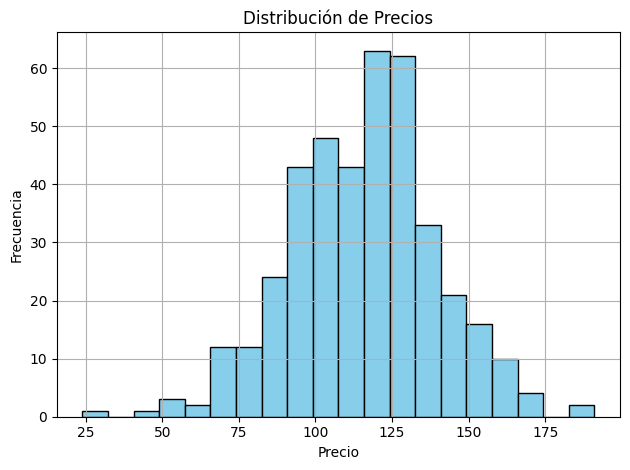

In [9]:
# Matplotlib: Histograma de precios
plt.hist(df["Price"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Bokeh: Dispersión Precio vs Ventas
p = figure(title="Precio vs Ventas", x_axis_label='Precio', y_axis_label='Ventas', height=350)
p.circle(df["Price"], df["Sales"], size=6, color="navy", alpha=0.5)
show(p)

In [11]:
# 4. PREPROCESAMIENTO Y MODELADO
# ===============================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [12]:
# Convertir a clasificación binaria
df['HighSales'] = df['Sales'].apply(lambda x: 1 if x > 8 else 0)
df.drop(columns=['Sales'], inplace=True)

In [13]:
# Codificar variables categóricas
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=['HighSales'])
y = df['HighSales']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("📋 Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("📊 Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))


📋 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84        64
           1       0.92      0.64      0.76        56

    accuracy                           0.81       120
   macro avg       0.84      0.80      0.80       120
weighted avg       0.83      0.81      0.80       120

📊 Matriz de Confusión:
 [[61  3]
 [20 36]]


In [14]:
# 5. GUARDAR MODELO
# ===============================
with open("carseats_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Modelo guardado como carseats_model.pkl")

Modelo guardado como carseats_model.pkl
